# Document Description

This notebook is concerned with the trends in the number of days the MJO occurs in each phase (sub and normal) each wet season. This notebook includes the calculations for the trends as well as the plotting of this information>

# Packages

In [27]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask.array
import cartopy.crs as ccrs
import matplotlib.colors as colors
import datetime as dt
from matplotlib.colors import BoundaryNorm
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import constants
import warnings
warnings.filterwarnings('ignore')
import os
import sys
from importlib import reload
sys.path.append('/home/563/ab2313/MJO/functions')

In [2]:
from scipy.stats import pearsonr

In [3]:
import sys
from importlib import reload
sys.path.append('')

# This is for loading in all the data sets that have been used in this study.
import load_dataset as load

# For splitting all of the data sets into the different phases.
import phase_calc_functions as phase_calc

# Collection of functions for plotting MJO phases.
import phase_plot_functions as phase_plot

# Collection of statistics
import mystats


In [4]:
import load_dataset_ot as ot

# Data

In [5]:
rmm_ot = ot.load_ot_rmm()
rmm_ot

Opening OT RMM from /g/data/w40/ab2313/mjo_and_rainfall_trend/mjoindex_IHR_20CRV2c.nc


<xarray.Dataset>
Dimensions:    (time: 40177)
Coordinates:
  * time       (time) datetime64[ns] 1905-01-01 1905-01-02 ... 2014-12-31
Data variables:
    t_IHR      (time) float32 ...
    RMM1       (time) float32 ...
    RMM2       (time) float32 ...
    amplitude  (time) float32 ...
    phase      (time) float32 ...
Attributes:
    description:  Reconstructed MJO Index (1905-2014)
    author:       Eric Oliver, Ph.D., Dalhousie University
    date:         2016-Nov-04 14:28:34
    File_Name:    data/mjoindex_IHR.nc
    Title:        Reconstructed MJO Index (1905-2014)
    Source_File:

In [6]:
# Non-reconstructed RMM plots
rmm_wh = load.load_rmm()
# rmm = phase_calc.load_rmm()

# Maths

In [7]:
rmm_ot_ws = phase_calc.wet_season_year(rmm_ot)
rmm_ot_ws = rmm_ot_ws.where(np.logical_and(rmm_ot_ws.phase < 10, rmm_ot_ws.amplitude < 10), np.nan)
rmm_ot_ws

<xarray.Dataset>
Dimensions:    (time: 13337)
Coordinates:
  * time       (time) datetime64[ns] 1905-01-01 1905-01-02 ... 2015-12-31
Data variables:
    t_IHR      (time) float32 6.958e+05 6.958e+05 ... 7.36e+05 7.36e+05
    RMM1       (time) float32 -0.3303 -0.3193 -0.3354 ... 1.329 1.27 0.8695
    RMM2       (time) float32 1.142 1.288 1.432 1.526 ... -0.3652 -0.1545 0.3881
    amplitude  (time) float32 1.189 1.327 1.471 1.572 ... 1.378 1.279 0.9522
    phase      (time) float32 7.0 7.0 7.0 7.0 7.0 7.0 ... 4.0 4.0 4.0 4.0 5.0
Attributes:
    description:  Reconstructed MJO Index (1905-2014)
    author:       Eric Oliver, Ph.D., Dalhousie University
    date:         2016-Nov-04 14:28:34
    File_Name:    data/mjoindex_IHR.nc
    Title:        Reconstructed MJO Index (1905-2014)
    Source_File:

In [8]:
rmm_wh_ws = phase_calc.wet_season_year(rmm_wh)
rmm_wh_ws = rmm_wh_ws.where(np.logical_and(rmm_wh_ws.phase < 10, rmm_wh_ws.amplitude < 10), np.nan)
rmm_wh_ws

<xarray.Dataset>
Dimensions:    (time: 5838)
Coordinates:
  * time       (time) datetime64[ns] 1975-01-01 1975-01-02 ... 2023-12-18
Data variables:
    RMM1       (time) float64 0.3499 0.4019 0.5453 ... 0.481 0.4439 0.1833
    RMM2       (time) float64 -1.022 -1.218 -1.07 ... -0.3618 -0.4644 -0.6095
    phase      (time) float64 3.0 3.0 3.0 3.0 3.0 3.0 ... 4.0 4.0 4.0 3.0 3.0
    amplitude  (time) float64 1.08 1.283 1.201 1.086 ... 0.6018 0.6425 0.6364

In [9]:
# Values should range between 1975 and 2021 for wet season
rmm_ot_ws = rmm_ot_ws.where(rmm_ot_ws.time.dt.year.isin(np.arange(1975,2021)), drop = True)
rmm_wh_ws = rmm_wh_ws.where(rmm_wh_ws.time.dt.year.isin(np.arange(1975,2021)), drop = True)

In [10]:
np.unique(rmm_wh_ws.time.dt.year.values)

array([1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020])

In [11]:
# Checking out how many points there are in each year.
xr.ones_like(rmm_wh_ws).phase.resample(time='Y').count()

<xarray.DataArray 'phase' (time: 46)>
array([121, 122, 121, 121, 121, 122, 121, 121, 121, 122, 121, 121, 121,
       122, 121, 121, 121, 122, 121, 121, 121, 122, 121, 121, 121, 122,
       121, 121, 121, 122, 121, 121, 121, 122, 121, 121, 121, 122, 121,
       121, 121, 122, 121, 121, 121, 122])
Coordinates:
  * time     (time) datetime64[ns] 1975-12-31 1976-12-31 ... 2020-12-31

# Original

In [12]:
def subphase_and_phase_count(rmm_ws):
    '''This funtions returns that phase count and subphase count of the number
    of days in the phase/subphase.'''
    
    import phase_calc_functions as phase_calc

    phase_count = phase_calc.count_in_rmm_phase(rmm_ws)

    phase_count = phase_count.rename({'time':'year'})
    phase_count['year'] = phase_count.year.dt.year.values

    # Countring the days in each Wheeler and Hendon Phase
    phase_calc = reload(phase_calc)

    # The number of days in each MJO phase (1-8) each wet season.
    rmm_count = phase_calc.count_in_rmm_phase(rmm_ws)

    # The number of days in each MJO subphase each wet season.
    rmm_count_sub = phase_calc.resample_phase_to_subphase(rmm_count)

    # Selecting just the years that are in the AWAP data set as RMM has a longer recored (till current date always).
    subphase_count = rmm_count_sub #.isel(year = slice(0,43))
    subphase_count['time'] = subphase_count.time.dt.year.values
    subphase_count = subphase_count.rename({'time':'year'})
    return phase_count, subphase_count

In [13]:
phase_count_wh, subphase_count_wh = subphase_and_phase_count(rmm_wh_ws)
phase_count_wh = phase_count_wh.sel(year=slice(1975, 2020))#.isel(year=slice(None, -1))
subphase_count_wh = subphase_count_wh.sel(year=slice(1975, 2020)) #isel(year=slice(None, -1))

In [14]:
# Should go between 1975 and 2020
np.unique(rmm_wh_ws.time.dt.year.values)

array([1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020])

In [15]:
# Should go between 1975 and 2020

subphase_count_wh.year.values

array([1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020])

In [16]:
len(subphase_count_wh.year.values)

46

In [17]:
phase_count_ot, subphase_count_ot = subphase_and_phase_count(rmm_ot_ws)
phase_count_ot = phase_count_ot.isel(year=slice(None, -1))
subphase_count_ot = subphase_count_ot.isel(year=slice(None, -1))
subphase_count_ot

<xarray.Dataset>
Dimensions:  (phase: 4, year: 40)
Coordinates:
  * year     (year) int64 1975 1976 1977 1978 1979 ... 2010 2011 2012 2013 2014
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    number   (phase, year) int64 22 24 32 23 21 48 30 ... 15 58 25 45 38 24 66

# Plotting

In [18]:
def mjo_single_phase_line_plot(ax, sub, **kwargs):
    
    func_kwargs = dict(label=None, linecolor = 'blue')
    
    for key, value in kwargs.items():
        func_kwargs[key] = value
        
    x = sub.year.values
    y = sub.values

    
    
    # Linear trend line
    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    
    # Statistical significance
    sig = mystats.mann_kendall(y)  
    sig_stor.append(sig)

    if sig < 0.1:
        plot_kwargs = dict(linestyle = '-',color = 'red')
        # The trend / mean * 100 (convert to percent) * 10 convert to per decade
        sub_vals = sub.values
        idx = np.isfinite(sub_vals)
        mean = np.mean(sub_vals[idx])
        
        percent_trend =  np.round(z[0] * 1000/ mean,1)
        label = str(np.round(z[0] * 10,1)) + ' days/decade\n(+{}% /decade)'.format(percent_trend)  

    else:
        plot_kwargs = dict(linestyle = '-',color = 'grey',label = 'Insignificant Trend')
    
    if 'plot_trend_line' in kwargs.keys():
        trend = ax.plot(x, p(x), **plot_kwargs)
    
    if sig < 0.01:
        plot_label = func_kwargs['label'] + f' - p-value < 0.01'
    else:
        plot_label = func_kwargs['label'] + f' - pvalue = {sig:.2f}'
    raw = ax.plot(x,y, label = plot_label, color = func_kwargs['linecolor'])


In [19]:
brown  = '#c38e3f'
green = '#44a198'

In [35]:
reload(constants)

<module 'constants' from '/home/563/ab2313/Documents/mjo_and_rainfall_trend/constants.py'>

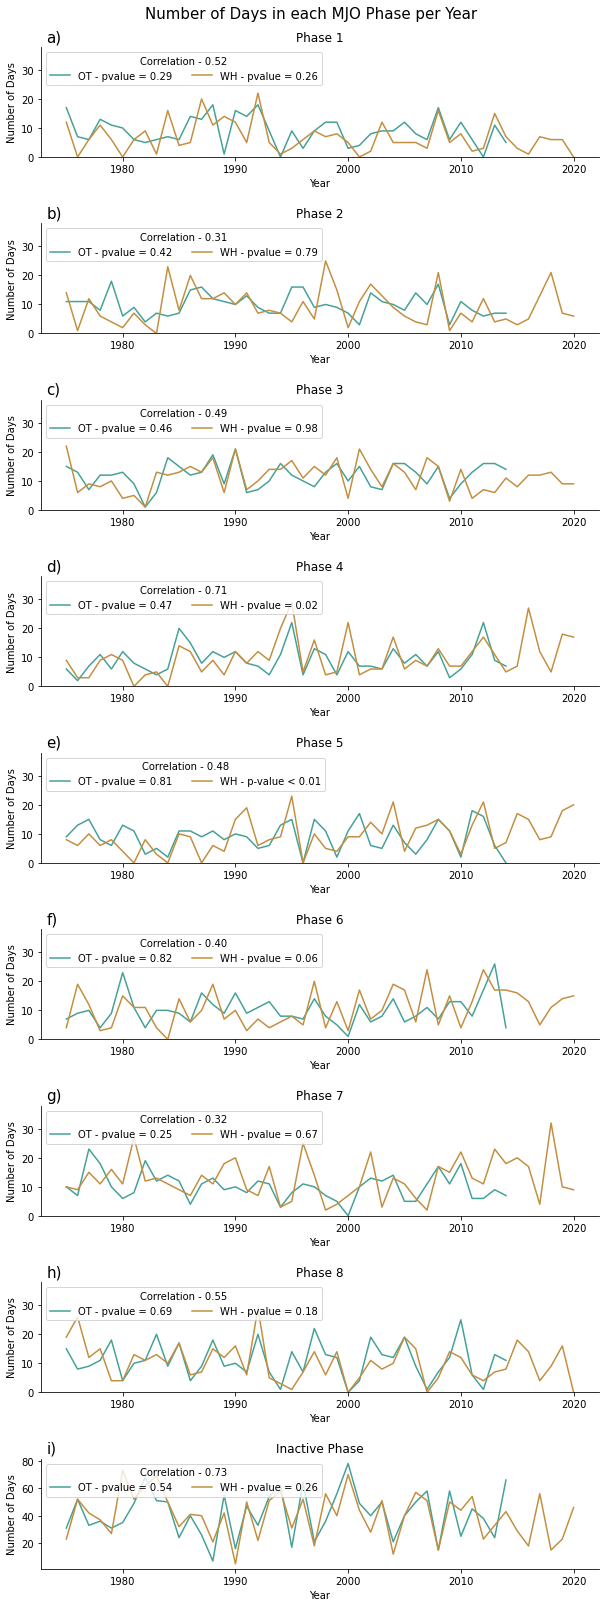

In [36]:
fig = plt.figure(figsize = (10,28))#(18,20))
gs = gridspec.GridSpec(9,1, hspace = 0.6)
DAYS_IN_3_MONTHS = 121

sig_stor = []

for i,phase in enumerate(phase_count_ot.phase.values):
    ax = fig.add_subplot(gs[i])
        
    
    single_phase_ot = phase_count_ot.sel(phase = phase).number
    mjo_single_phase_line_plot(ax, single_phase_ot, linecolor=green, label='OT')
    
    single_phase_wh = phase_count_wh.sel(phase = phase).number
    mjo_single_phase_line_plot(ax, single_phase_wh, linecolor=brown, label='WH')
    

    pcor = pearsonr(single_phase_wh[:len(single_phase_ot)], single_phase_ot)[0]
    
    # Defining titles
    if i == 8:
        ax.set_title('Inactive Phase')
    else:
        ax.set_title('Phase ' + phase)
        ax.set_ylim(0,38)
    ax.set_ylabel('Number of Days')
    ax.set_xlabel('Year')
    leg = ax.legend(loc = 'upper left', ncol=2)
    leg.set_title(f'Correlation - {pcor:.2f}')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.annotate(chr(97+i) +')', xy = (0.01,1.05), xycoords = 'axes fraction', size = 15)



title = 'Number of Days in each MJO Phase per Year'
fig.suptitle(title, y =0.9, fontsize = 15 );


fig.savefig(os.path.join(constants.IMAGE_SAVE_DIR, 'rmm_trend_phase_DecToMarch_OT_and_WH_col1.png')
                         , dpi = 800, bbox_inches = 'tight')

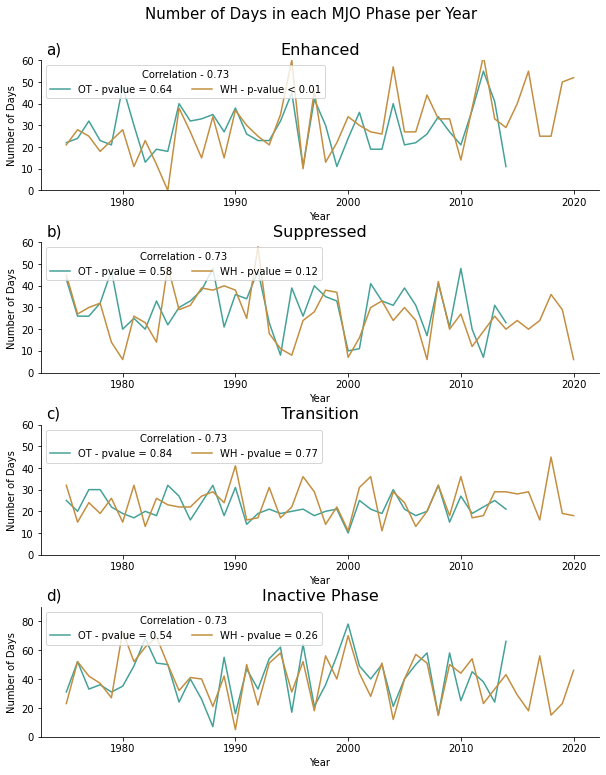

In [44]:
fig = plt.figure(figsize = (10,28/9*4))#(18,20))
gs = gridspec.GridSpec(4,1, hspace = 0.4)


sig_stor = []

for i,phase in enumerate(subphase_count_ot.phase.values):
    ax = fig.add_subplot(gs[i])
    
    single_phase_ot = subphase_count_ot.sel(phase = phase).number
    mjo_single_phase_line_plot(ax, single_phase_ot, linecolor=green, label='OT')
    
    
    single_phase_wh = subphase_count_wh.sel(phase = phase).number
    mjo_single_phase_line_plot(ax, single_phase_wh, linecolor=brown, label='WH')
    
    
    # Defining titles
    if phase == 'inactive':
        ax.set_title('Inactive Phase', size=16)
        ax.set_ylim([0, 90])
    else:
        ax.set_title(phase.capitalize(), size=16)
        ax.set_ylim(0,60)
    ax.set_ylabel('Number of Days')
    ax.set_xlabel('Year')
    leg = ax.legend(loc = 'upper left', ncol=2)
    leg.set_title(f'Correlation - {pcor:.2f}')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.annotate(chr(97+i) +')', xy = (0.01,1.05), xycoords = 'axes fraction', size = 15)


title = 'Number of Days in each MJO Phase per Year'
fig.suptitle(title, y =0.94, fontsize = 15 );


fig.savefig(os.path.join(constants.IMAGE_SAVE_DIR, 'rmm_trend_subphase_DecToMarch_OT_and_WH_col1_4rows.png'), 
                         dpi = 800, bbox_inches = 'tight')

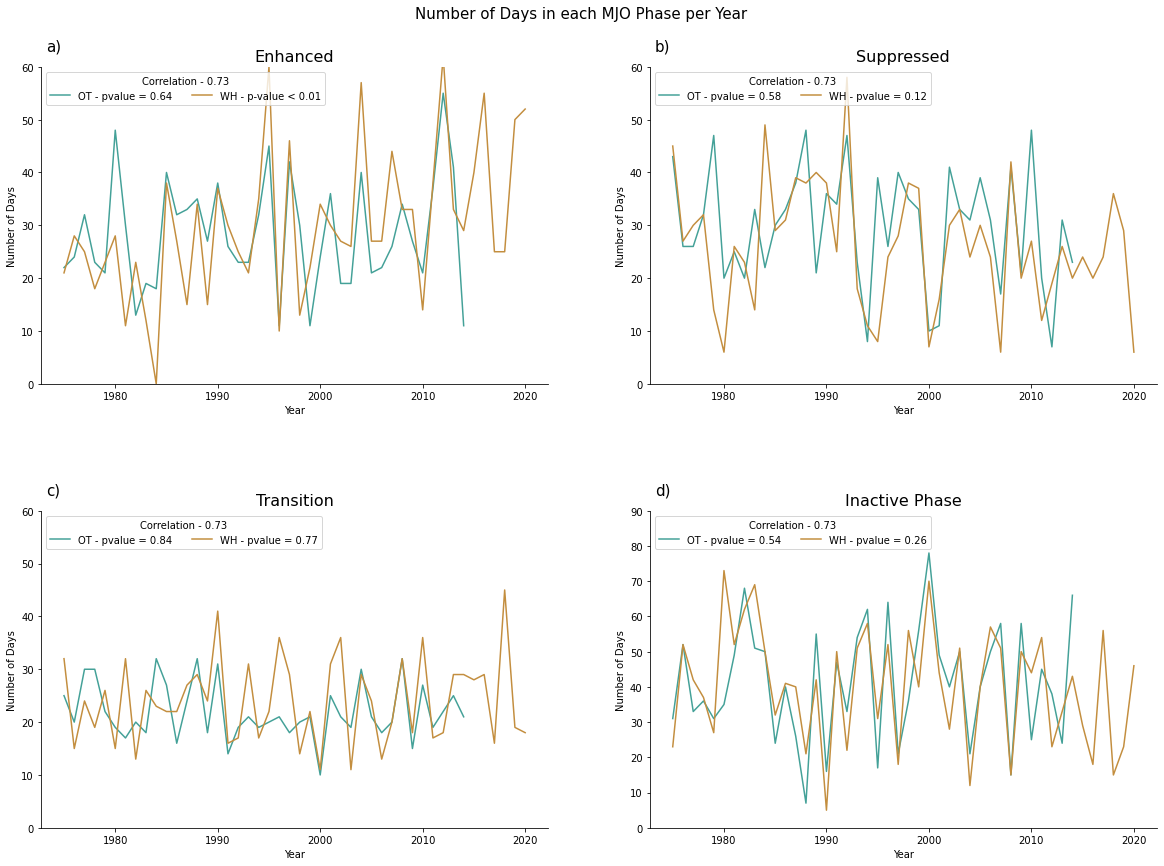

In [42]:
fig = plt.figure(figsize = (20,14))#(18,20))
gs = gridspec.GridSpec(2,2, hspace = 0.4)


sig_stor = []

for i,phase in enumerate(subphase_count_ot.phase.values):
    ax = fig.add_subplot(gs[i])
    
    single_phase_ot = subphase_count_ot.sel(phase = phase).number
    mjo_single_phase_line_plot(ax, single_phase_ot, linecolor=green, label='OT')
    
    
    single_phase_wh = subphase_count_wh.sel(phase = phase).number
    mjo_single_phase_line_plot(ax, single_phase_wh, linecolor=brown, label='WH')
    
    
    # Defining titles
    if phase == 'inactive':
        ax.set_title('Inactive Phase', size=16)
        ax.set_ylim([0, 90])
    else:
        ax.set_title(phase.capitalize(), size=16)
        ax.set_ylim(0,60)
    ax.set_ylabel('Number of Days')
    ax.set_xlabel('Year')
    leg = ax.legend(loc = 'upper left', ncol=2)
    leg.set_title(f'Correlation - {pcor:.2f}')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.annotate(chr(97+i) +')', xy = (0.01,1.05), xycoords = 'axes fraction', size = 15)


title = 'Number of Days in each MJO Phase per Year'
fig.suptitle(title, y =0.94, fontsize = 15 );


fig.savefig(os.path.join(constants.IMAGE_SAVE_DIR, 'rmm_trend_subphase_DecToMarch_OT_and_WH_col1.png'), 
                         dpi = 800, bbox_inches = 'tight')